In [0]:
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv('/content/smsspamcollection.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(df)

5572

In [8]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

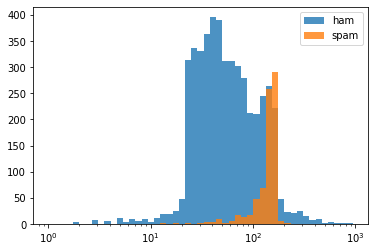

In [10]:
import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.15 ** (np.arange(0, 50))
plt.hist(df[df['label'] == 'ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

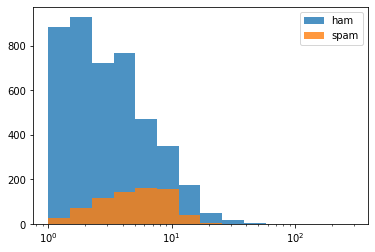

In [13]:
plt.xscale('log')
bins = 1.5 ** (np.arange(0, 15))
plt.hist(df[df['label'] == 'ham']['punct'], bins=bins, alpha=0.8)
plt.hist(df[df['label'] == 'spam']['punct'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df[['length', 'punct']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr_model = LogisticRegression(solver='lbfgs')

In [19]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn import metrics

In [0]:
predictions = lr_model.predict(X_test)

In [23]:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [24]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions), index=['ham', 'spam'], columns=['ham', 'spam'])
df

,ham,spam
ham,1404,44
spam,219,5


In [26]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [27]:
print(metrics.accuracy_score(y_test, predictions))

0.8427033492822966


In [28]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
predictions = nb_model.predict(X_test)

In [30]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [31]:
print(metrics.confusion_matrix(y_test, predictions))

[[1438   10]
 [ 224    0]]


In [32]:
print(metrics.accuracy_score(y_test, predictions))

0.8600478468899522


In [34]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

[[1373   75]
 [ 121  103]]
              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672

0.8827751196172249
